In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt 

In [2]:
data = pd.read_csv('Features_Zipcode_Final.csv')

In [3]:
data.head()

,ZIPCODE,TOTAL STREET LENGTH,TOTAL BIKE LANE LENGTH,BIKE LANE DENSITY,NUM_DOCKS_AVAILABLE,TRIPS,NORMALIZED ACCIDENT COUNT,WHITE_POP %,POPULATION,ACCIDENT COUNT,MEAN INCOME
0,11436,NaN,NaN,NaN,NaN,8192.653036,0.378388,7.031032,17949.0,31.0,29271.0
1,11213,146367.805288,28632.146155,0.195618,NaN,780.000000,45.128205,28.880142,63767.0,352.0,29216.0
2,11212,215912.786687,40575.901547,0.187927,NaN,87326.231788,0.381329,11.172781,84500.0,333.0,20958.0
3,11225,114141.251961,26079.822125,0.228487,149.0,6879.000000,4.564617,31.436415,56829.0,314.0,38992.0
4,11218,208355.389994,24186.845000,0.116085,23.0,1186.000000,28.667791,62.269343,75220.0,340.0,36189.0


In [4]:
data.shape

(248, 11)

In [5]:
data1 = data[['ZIPCODE','BIKE LANE DENSITY','NORMALIZED ACCIDENT COUNT']].dropna().set_index('ZIPCODE',drop=True)
data1.columns = data1.columns.str.replace(' ', '_')
data1.shape

(178, 2)

In [6]:
base = 10

data1['Log_NORMALIZED_ACCIDENT_COUNT'] = np.log(np.array(data1['NORMALIZED_ACCIDENT_COUNT'])+1e-1)/np.log(base)
data1['Log_BIKE_LANE_DENSITY'] = np.log(np.array(data1['BIKE_LANE_DENSITY'])+1e-9)/np.log(base)


root = 2
data1['Root_NORMALIZED_ACCIDENT_COUNT'] = np.power((np.array(data1['NORMALIZED_ACCIDENT_COUNT'])),1/root)
data1['Root_BIKE_LANE_DENSITY'] = np.power((np.array(data1['BIKE_LANE_DENSITY'])),1/root)

data1['LR_NORMALIZED_ACCIDENT_COUNT'] = np.log(np.array(data1['Root_NORMALIZED_ACCIDENT_COUNT'])+1e-1)/np.log(base)
data1['LR_BIKE_LANE_DENSITY'] = np.log(np.array(data1['Root_BIKE_LANE_DENSITY'])+1e-9)/np.log(base)

In [7]:
data1.head()

,BIKE_LANE_DENSITY,NORMALIZED_ACCIDENT_COUNT,Log_NORMALIZED_ACCIDENT_COUNT,Log_BIKE_LANE_DENSITY,Root_NORMALIZED_ACCIDENT_COUNT,Root_BIKE_LANE_DENSITY,LR_NORMALIZED_ACCIDENT_COUNT,LR_BIKE_LANE_DENSITY
ZIPCODE,,,,,,,,
11213,0.195618,45.128205,1.655409,-0.708592,6.717753,0.442287,0.833641,-0.354296
11212,0.187927,0.381329,-0.317558,-0.726010,0.617518,0.433506,-0.144167,-0.363005
11225,0.228487,4.564617,0.668816,-0.641138,2.136496,0.478003,0.349568,-0.320569
11218,0.116085,28.667791,1.458907,-0.935226,5.354231,0.340712,0.736734,-0.467613
11226,0.136211,260.621762,2.416177,-0.865787,16.143784,0.369068,1.210687,-0.432894


In [8]:
data1.describe()

,BIKE_LANE_DENSITY,NORMALIZED_ACCIDENT_COUNT,Log_NORMALIZED_ACCIDENT_COUNT,Log_BIKE_LANE_DENSITY,Root_NORMALIZED_ACCIDENT_COUNT,Root_BIKE_LANE_DENSITY,LR_NORMALIZED_ACCIDENT_COUNT,LR_BIKE_LANE_DENSITY
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.176869,5.509394,-0.023510,-0.944565,1.339503,0.386637,-0.009585,-0.472282
std,0.132892,24.134541,0.624936,0.541144,1.932903,0.165938,0.335844,0.270572
min,0.000243,0.000000,-1.000000,-3.614273,0.000000,0.015591,-1.000000,-1.807137
25%,0.073142,0.375112,-0.323204,-1.135838,0.612464,0.270447,-0.147237,-0.567919
50%,0.156311,0.400976,-0.300184,-0.806034,0.633226,0.395356,-0.134762,-0.403017
75%,0.252600,1.141723,0.094022,-0.597567,1.068512,0.502593,0.067633,-0.298783
max,0.574144,260.621762,2.416177,-0.240979,16.143784,0.757723,1.210687,-0.120490


In [9]:
data1.shape

(178, 8)

In [10]:
lm = smf.ols(formula='Root_NORMALIZED_ACCIDENT_COUNT~Log_BIKE_LANE_DENSITY-1',data=data1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     Root_NORMALIZED_ACCIDENT_COUNT   R-squared (uncentered):                   0.208
Model:                                        OLS   Adj. R-squared (uncentered):              0.203
Method:                             Least Squares   F-statistic:                              46.36
Date:                            Fri, 09 Dec 2022   Prob (F-statistic):                    1.47e-10
Time:                                    11:26:36   Log-Likelihood:                         -383.74
No. Observations:                             178   AIC:                                      769.5
Df Residuals:                                 177   BIC:                                      772.7
Df Model:                                       1                                                  
Covariance Type:                        nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Log_BIKE_LANE_DENSITY    -0.9830      0.144     -6.809      0.000      -1.268      -0.698
==============================================================================
Omnibus:                      174.531   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3467.900
Skew:                           3.728   Prob(JB):                         0.00
Kurtosis:                      23.297   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>The p-value is <5% indicating that is it statistically significant

Let us plot and see the result

<AxesSubplot:xlabel='Log_BIKE_LANE_DENSITY', ylabel='Root_NORMALIZED_ACCIDENT_COUNT'>

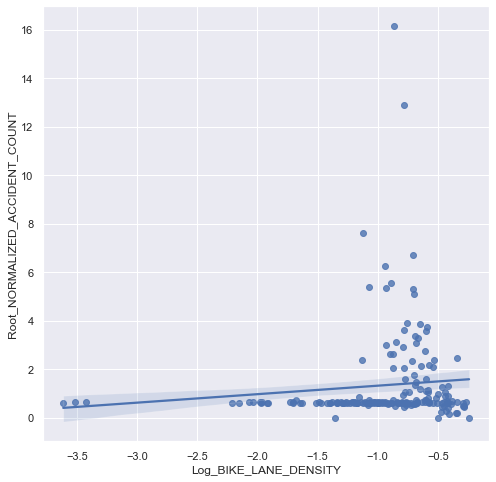

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
sns.regplot(x='Log_BIKE_LANE_DENSITY', y='Root_NORMALIZED_ACCIDENT_COUNT',data=data1)

$$\sqrt{Normalized Accident Count}= -0.9830log(Bike Lane Density)$$ 

$$Normalized Accident Count= (-0.9830log(Bike Lane Density))^2$$ 

In our range from 0 to 1 for bike lane density, this would mean that as bike lane density increases, the Normalized Accident count decreases exponentially.

In [12]:
x_mesh = np.linspace(np.min(data1['BIKE_LANE_DENSITY']),np.max(data1['BIKE_LANE_DENSITY']),100)
y_mesh = np.power(-0.9830*np.log(x_mesh),2)

Text(0, 0.5, 'Normalized Accident Count')

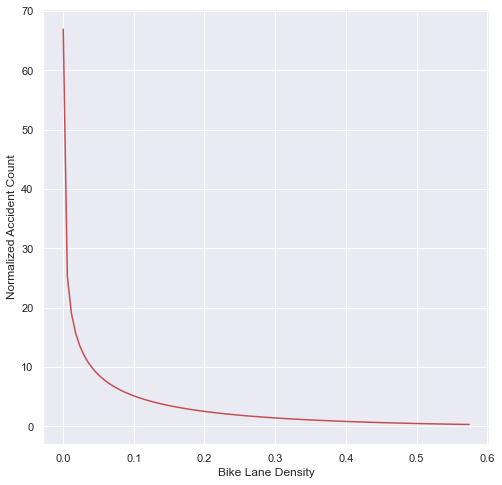

In [13]:
plt.plot(x_mesh,y_mesh,'-r')
plt.xlabel('Bike Lane Density')
plt.ylabel('Normalized Accident Count')